<a href="https://colab.research.google.com/github/spmani99/Engine-Health-Prediction/blob/main/Engine_Health_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Datset

In [ ]:
engine_data = pd.read_csv('engine_data.csv');
engine_data.head(10)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0
6,716,3.568896,5.312266,2.461067,83.646589,79.792411,1
7,729,3.845166,10.191126,2.362998,77.921202,71.671761,1
8,845,4.877239,3.638269,3.525604,76.301626,70.496024,0
9,824,3.741228,7.626214,1.301032,77.066520,85.143297,0


In [ ]:
engine_data.tail(10)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
19525,542,3.197979,3.520826,3.392164,75.789054,68.349748,1
19526,619,4.350691,9.093116,2.314457,76.821684,92.398667,1
19527,997,2.403141,6.784254,1.656750,74.341755,80.989245,1
19528,549,2.929697,3.826892,1.977592,76.902564,74.912950,1
19529,797,3.368795,6.057227,1.721997,74.295698,75.222218,0
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1
19534,504,3.775246,3.962480,2.038647,75.564313,80.421421,1


In [ ]:
engine_data.shape

(19535, 7)

## Exploratory Data Analysis

In [ ]:
engine_data.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [ ]:
engine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


## Checking the null values in all the columns

In [ ]:
engine_data.isnull().any()

Engine rpm          False
Lub oil pressure    False
Fuel pressure       False
Coolant pressure    False
lub oil temp        False
Coolant temp        False
Engine Condition    False
dtype: bool

In [ ]:
## function to check null values
null_value_count = {}
for column in engine_data.columns :
    null_count = engine_data[column].isnull().sum()
    if null_count > 0 :
        null_value_count[column] = null_count
if not null_value_count :
    print("No null values found in any column...")
else  :
    for col, null_count in null_value_count.items():
        print(f"Column '{col}' has {null_count} null values..")

No null values found in any column...


* According to the results above the dataset doesn't have missing or null values

## Checking for duplicate values

In [ ]:
print(engine_data.duplicated().value_counts())

False    19535
dtype: int64


- Here, this dataset doesn't have duplicate values too.

## Check for outliers

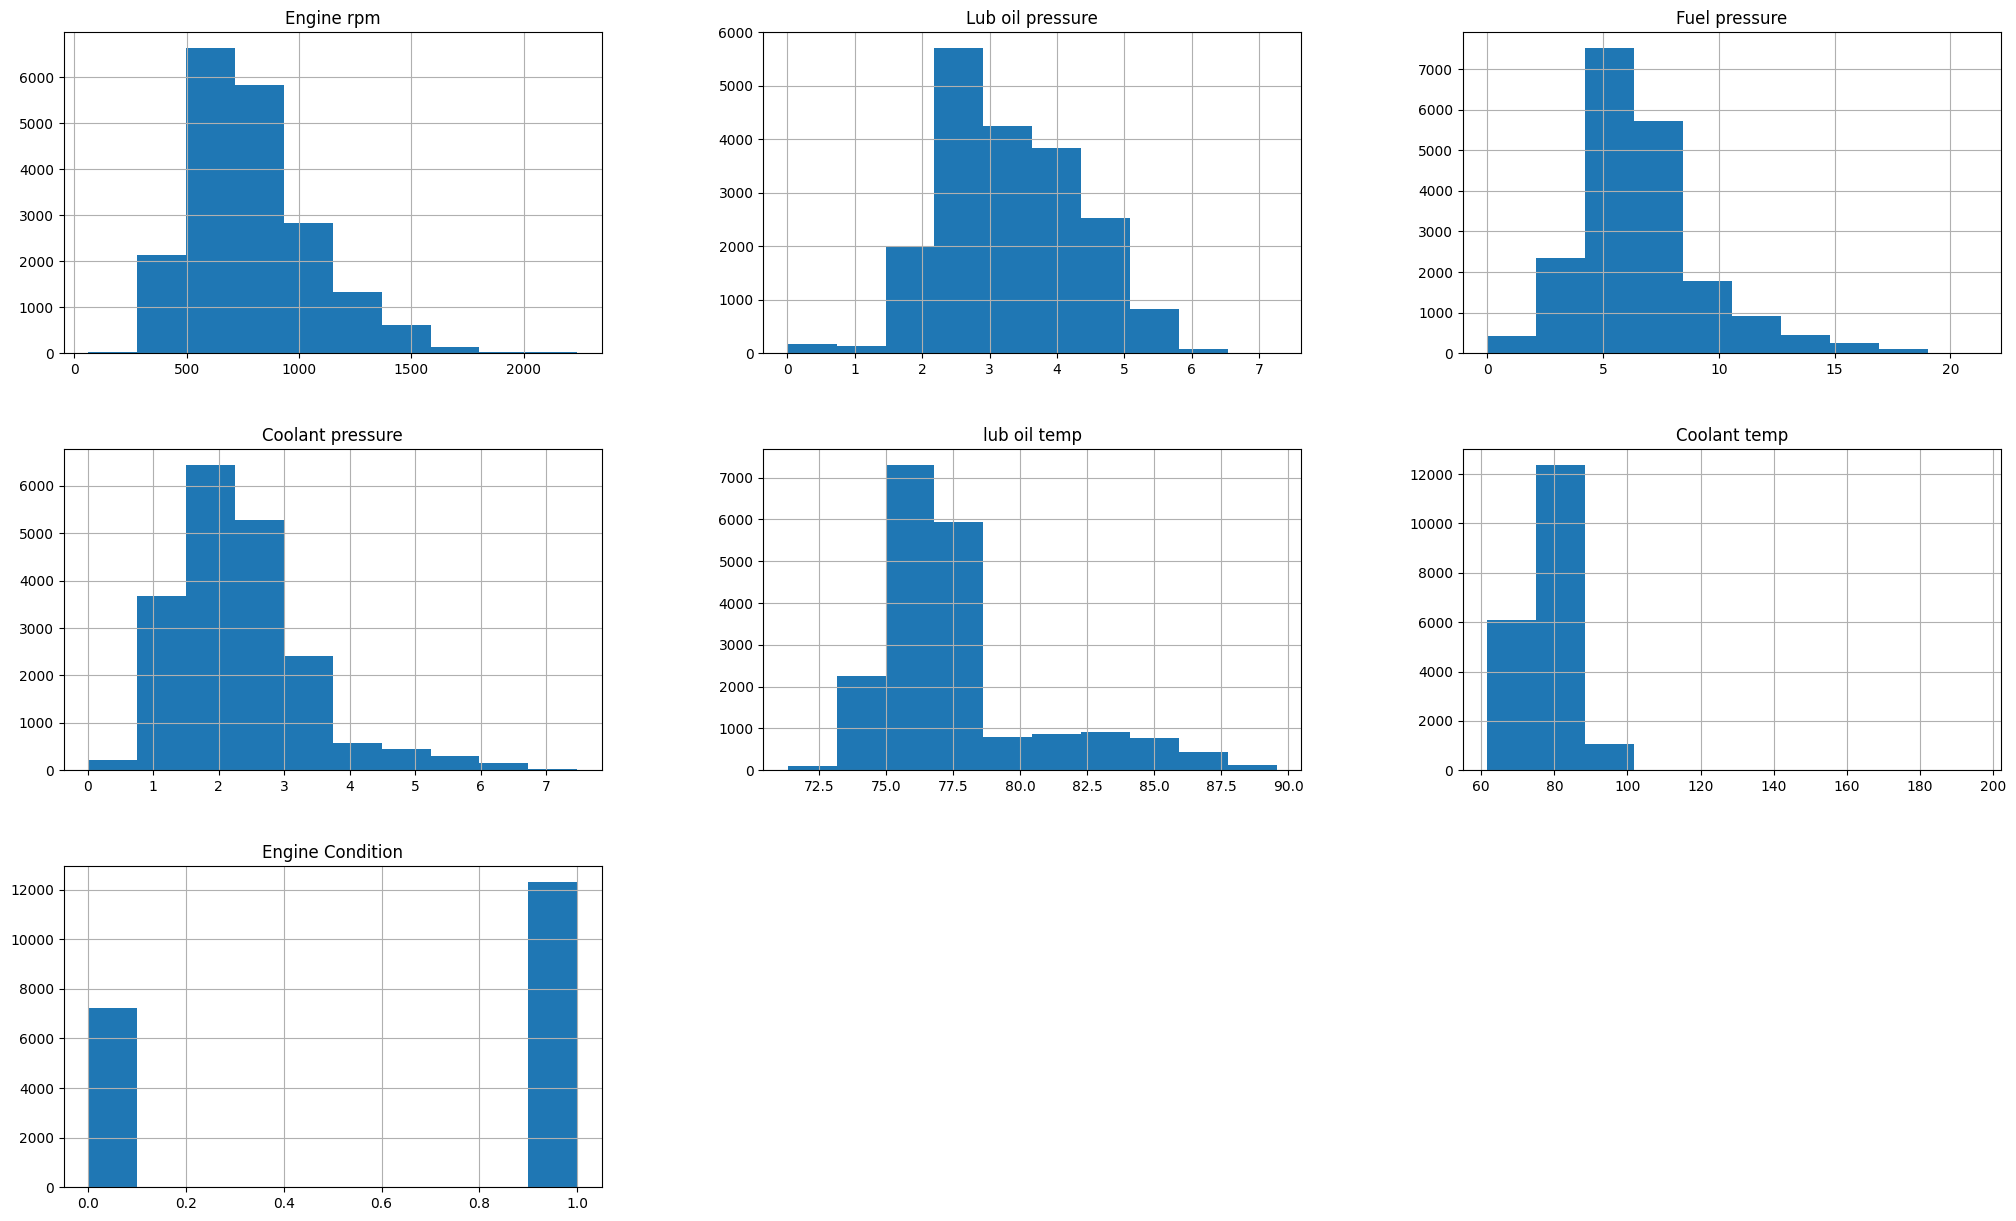

In [ ]:
# Lets first plot the histograms for each feature
engine_data.hist(figsize=(25,15))
plt.show()

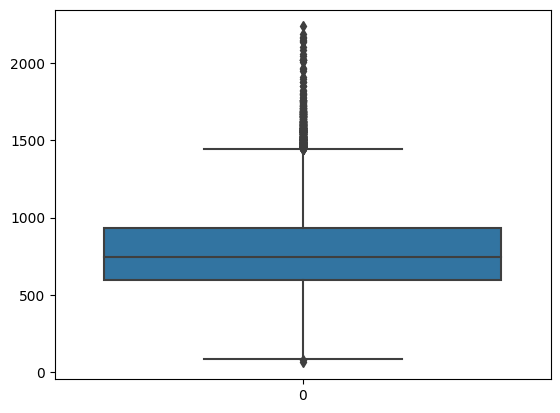

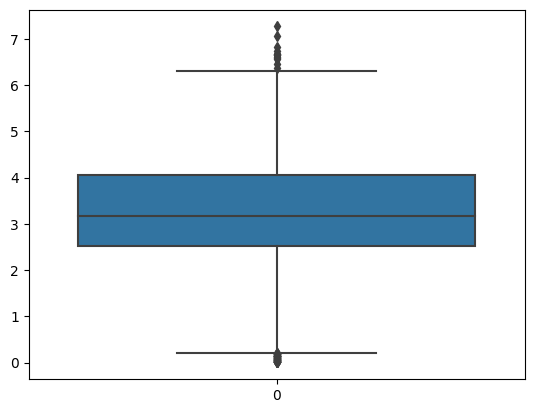

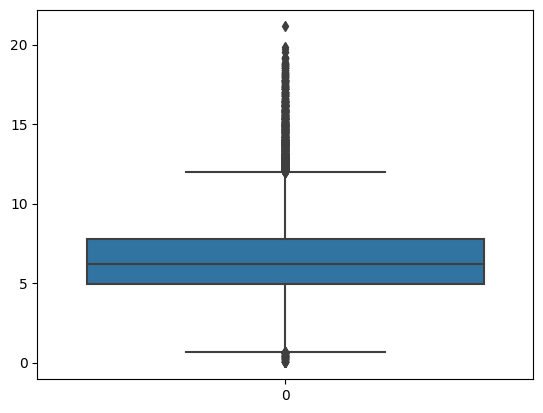

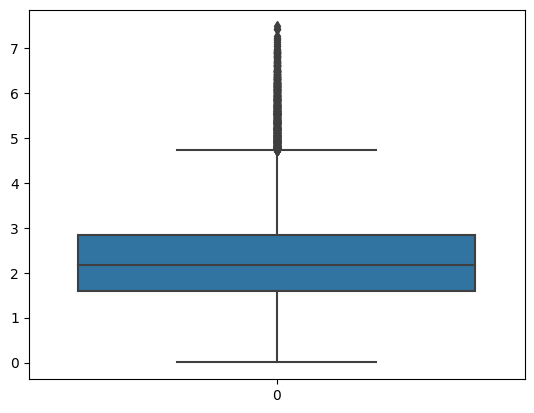

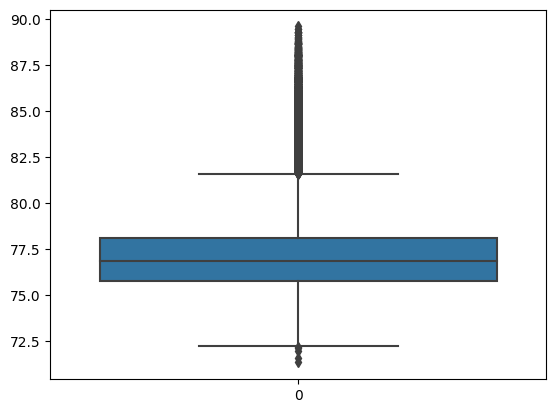

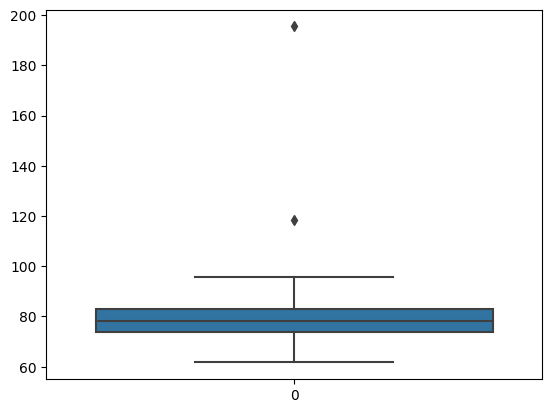

In [ ]:
## Let's draw blox plots to check outliers
columns_to_plot = engine_data.drop("Engine Condition", axis=1) # we don't need to plot the histogram for Target variable
for column in columns_to_plot.columns :
    sns.boxplot(columns_to_plot[column])
    plt.show()

In [ ]:
## Getting outlier count
q1 = columns_to_plot.quantile(0.25)
q3 = columns_to_plot.quantile(0.75)

IQR = q3 -q1

whisker1 = q1 - 1.5 * IQR
whisker2 = q3 + 1.5 * IQR

((columns_to_plot < whisker1) | (columns_to_plot > whisker2)).sum()

Engine rpm           464
Lub oil pressure      66
Fuel pressure       1135
Coolant pressure     785
lub oil temp        2617
Coolant temp           2
dtype: int64

Before Outlier Handling :  (19535, 7)
After Outlier Handling : (19535, 7)


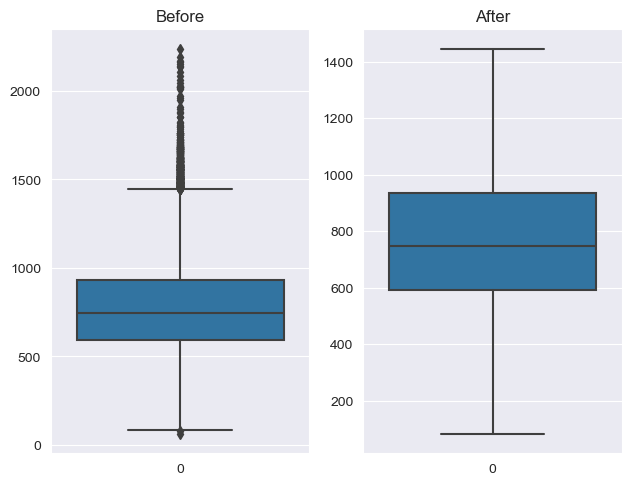

In [ ]:
# Replacing outliers for Engine RPM using IQR Method
plot_fig, axis = plt.subplots(1,2)
plt.tight_layout()

print("Before Outlier Handling : ",engine_data.shape)
sns.boxplot(engine_data["Engine rpm"],orient='v',ax=axis[0])
axis[0].title.set_text("Before")

# Using IQR Method
Q1 = engine_data['Engine rpm'].quantile(0.25)
Q3 = engine_data['Engine rpm'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR  # Whisker Limits
upper_limit = Q3 + 1.5*IQR  # Whisker Limits

engine_data_new = engine_data
engine_data_new['Engine rpm'] = np.where(engine_data['Engine rpm']>upper_limit,upper_limit,engine_data_new['Engine rpm'])
engine_data_new['Engine rpm'] = np.where(engine_data['Engine rpm']<lower_limit,lower_limit,engine_data_new['Engine rpm'])
print("After Outlier Handling :", engine_data_new.shape)
sns.boxplot(engine_data_new['Engine rpm'],orient='v',ax=axis[1])
axis[1].title.set_text("After")
plt.show()

engine_data = engine_data_new

Before Outlier Handling :  (19535, 7)
After Outlier Handling : (19535, 7)


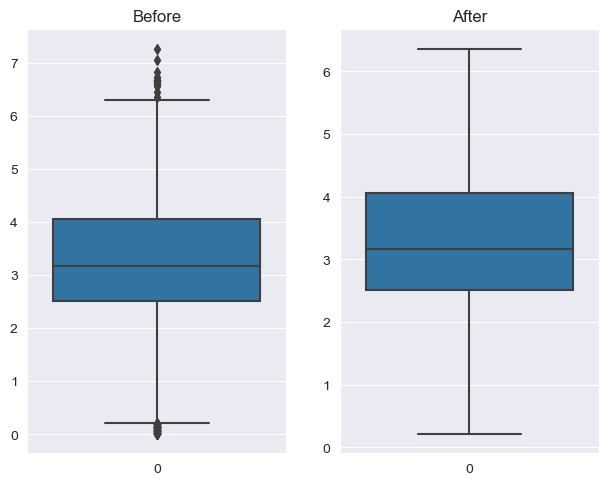

In [ ]:
# Replacing outliers for Lub Oil Pressure using IQR Method
plot_fig, axis = plt.subplots(1,2)
plt.tight_layout()

print("Before Outlier Handling : ",engine_data.shape)
sns.boxplot(engine_data["Lub oil pressure"],orient='v',ax=axis[0])
axis[0].title.set_text("Before")

# Using IQR Method
Q1 = engine_data['Lub oil pressure'].quantile(0.25)
Q3 = engine_data['Lub oil pressure'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR  # Whisker Limits
upper_limit = Q3 + 1.5*IQR  # Whisker Limits

engine_data_new = engine_data
engine_data_new['Lub oil pressure'] = np.where(engine_data['Lub oil pressure']>upper_limit,upper_limit,engine_data_new['Lub oil pressure'])
engine_data_new['Lub oil pressure'] = np.where(engine_data['Lub oil pressure']<lower_limit,lower_limit,engine_data_new['Lub oil pressure'])
print("After Outlier Handling :", engine_data_new.shape)
sns.boxplot(engine_data_new['Lub oil pressure'],orient='v',ax=axis[1])
axis[1].title.set_text("After")
plt.show()

engine_data = engine_data_new

Before Outlier Handling :  (19535, 7)
After Outlier Handling : (19535, 7)


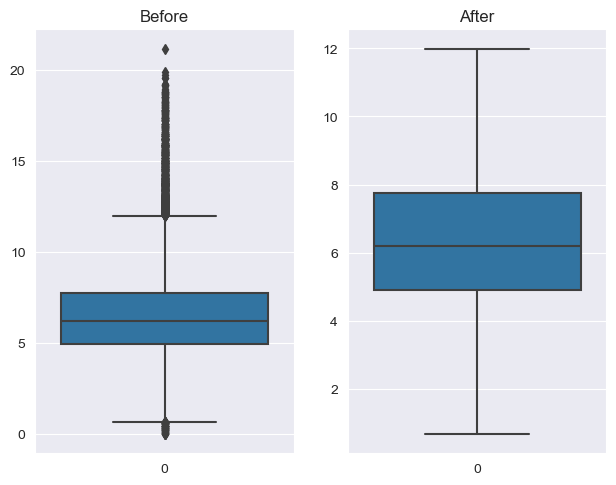

In [ ]:
# Replacing outliers for Fuel Pressure using IQR Method
plot_fig, axis = plt.subplots(1,2)
plt.tight_layout()

print("Before Outlier Handling : ",engine_data.shape)
sns.boxplot(engine_data["Fuel pressure"],orient='v',ax=axis[0])
axis[0].title.set_text("Before")

# Using IQR Method
Q1 = engine_data['Fuel pressure'].quantile(0.25)
Q3 = engine_data['Fuel pressure'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR  # Whisker Limits
upper_limit = Q3 + 1.5*IQR  # Whisker Limits

engine_data_new = engine_data
engine_data_new['Fuel pressure'] = np.where(engine_data['Fuel pressure']>upper_limit,upper_limit,engine_data_new['Fuel pressure'])
engine_data_new['Fuel pressure'] = np.where(engine_data['Fuel pressure']<lower_limit,lower_limit,engine_data_new['Fuel pressure'])
print("After Outlier Handling :", engine_data_new.shape)
sns.boxplot(engine_data_new['Fuel pressure'],orient='v',ax=axis[1])
axis[1].title.set_text("After")
plt.show()

engine_data = engine_data_new

Before Outlier Handling :  (19535, 7)
After Outlier Handling : (19535, 7)


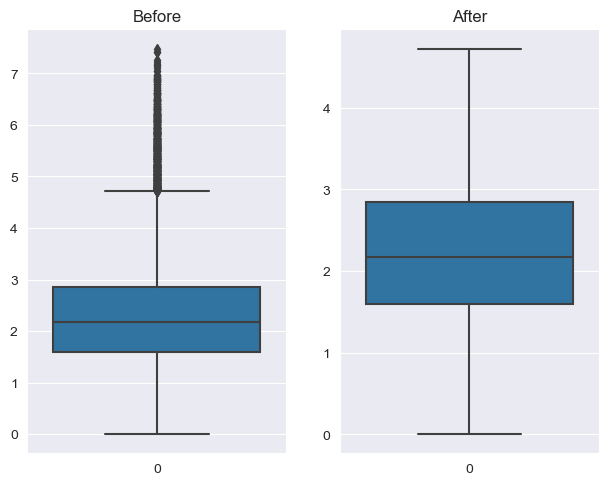

In [ ]:
# Replacing outliers for Coolant pressure using IQR Method
plot_fig, axis = plt.subplots(1,2)
plt.tight_layout()

print("Before Outlier Handling : ",engine_data.shape)
sns.boxplot(engine_data["Coolant pressure"],orient='v',ax=axis[0])
axis[0].title.set_text("Before")

# Using IQR Method
Q1 = engine_data['Coolant pressure'].quantile(0.25)
Q3 = engine_data['Coolant pressure'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR  # Whisker Limits
upper_limit = Q3 + 1.5*IQR  # Whisker Limits

engine_data_new = engine_data
engine_data_new['Coolant pressure'] = np.where(engine_data['Coolant pressure']>upper_limit,upper_limit,engine_data_new['Coolant pressure'])
engine_data_new['Coolant pressure'] = np.where(engine_data['Coolant pressure']<lower_limit,lower_limit,engine_data_new['Coolant pressure'])
print("After Outlier Handling :", engine_data_new.shape)
sns.boxplot(engine_data_new['Coolant pressure'],orient='v',ax=axis[1])
axis[1].title.set_text("After")
plt.show()

engine_data = engine_data_new

Before Outlier Handling :  (19535, 7)
After Outlier Handling : (19535, 7)


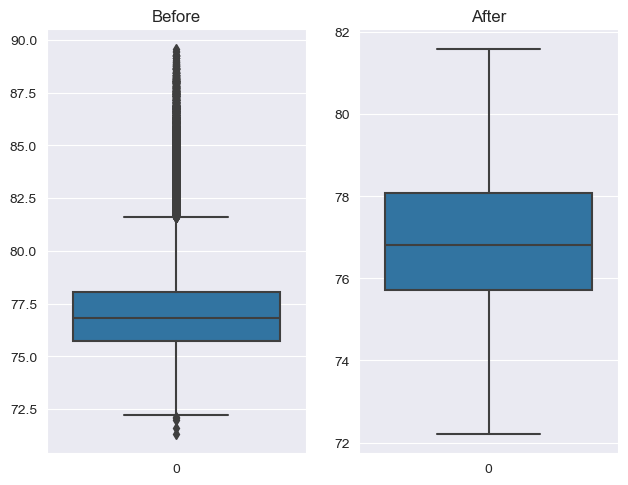

In [ ]:
# Replacing outliers for lub oil temp using IQR Method
plot_fig, axis = plt.subplots(1,2)
plt.tight_layout()

print("Before Outlier Handling : ",engine_data.shape)
sns.boxplot(engine_data["lub oil temp"],orient='v',ax=axis[0])
axis[0].title.set_text("Before")

# Using IQR Method
Q1 = engine_data['lub oil temp'].quantile(0.25)
Q3 = engine_data['lub oil temp'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR  # Whisker Limits
upper_limit = Q3 + 1.5*IQR  # Whisker Limits

engine_data_new = engine_data
engine_data_new['lub oil temp'] = np.where(engine_data['lub oil temp']>upper_limit,upper_limit,engine_data_new['lub oil temp'])
engine_data_new['lub oil temp'] = np.where(engine_data['lub oil temp']<lower_limit,lower_limit,engine_data_new['lub oil temp'])
print("After Outlier Handling :", engine_data_new.shape)
sns.boxplot(engine_data_new['lub oil temp'],orient='v',ax=axis[1])
axis[1].title.set_text("After")
plt.show()

engine_data = engine_data_new

Before Outlier Handling :  (19535, 7)
After Outlier Handling : (19535, 7)


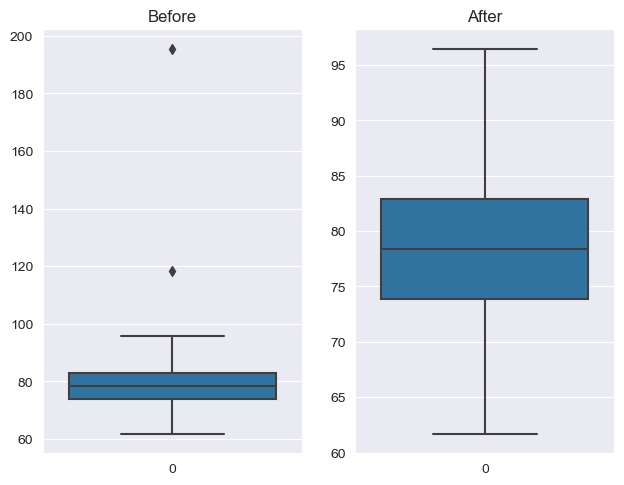

In [ ]:
# Replacing outliers for lub oil temp using IQR Method
plot_fig, axis = plt.subplots(1,2)
plt.tight_layout()

print("Before Outlier Handling : ",engine_data.shape)
sns.boxplot(engine_data["Coolant temp"],orient='v',ax=axis[0])
axis[0].title.set_text("Before")

# Using IQR Method
Q1 = engine_data['Coolant temp'].quantile(0.25)
Q3 = engine_data['Coolant temp'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR  # Whisker Limits
upper_limit = Q3 + 1.5*IQR  # Whisker Limits

engine_data_new = engine_data
engine_data_new['Coolant temp'] = np.where(engine_data['Coolant temp']>upper_limit,upper_limit,engine_data_new['Coolant temp'])
engine_data_new['Coolant temp'] = np.where(engine_data['Coolant temp']<lower_limit,lower_limit,engine_data_new['Coolant temp'])
print("After Outlier Handling :", engine_data_new.shape)
sns.boxplot(engine_data_new['Coolant temp'],orient='v',ax=axis[1])
axis[1].title.set_text("After")
plt.show()

engine_data = engine_data_new

In [ ]:
## Getting outlier count After outlier handling
q1 = engine_data.quantile(0.25)
q3 = engine_data.quantile(0.75)

IQR = q3 -q1

whisker1 = q1 - 1.5 * IQR
whisker2 = q3 + 1.5 * IQR

((engine_data < whisker1) | (engine_data > whisker2)).sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

<Figure size 2500x1500 with 0 Axes>

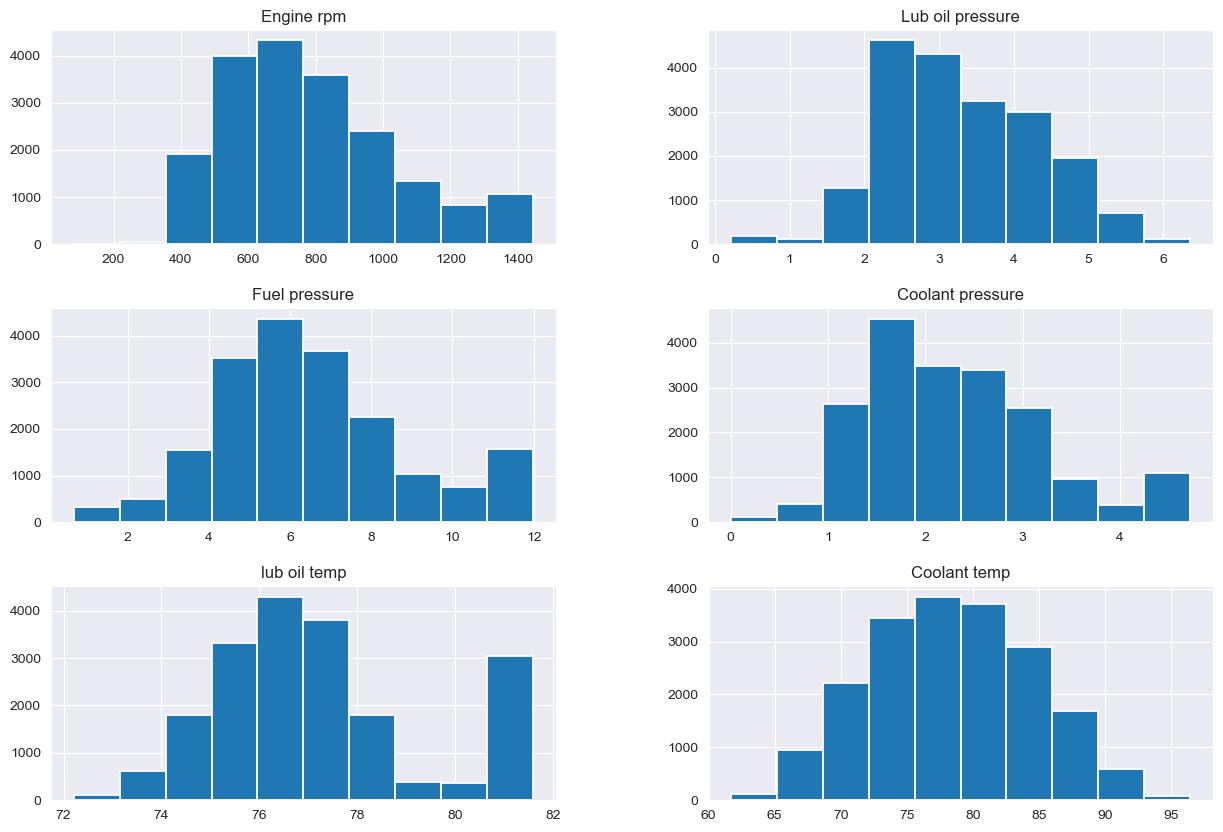

<Figure size 2500x1500 with 0 Axes>

In [ ]:
columns_to_plot = engine_data.drop("Engine Condition", axis=1)
columns_to_plot.hist(linewidth=1.3, figsize=(15,10))
plt.figure(figsize=(25,15))

* Now the dataset doesn't have any outliers

C:\Users\kisha\anaconda3\envs\DataMining_Project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kisha\anaconda3\envs\DataMining_Project\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kisha\anaconda3\envs\DataMining_Project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kisha\anaconda3\envs\DataMining_Project\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

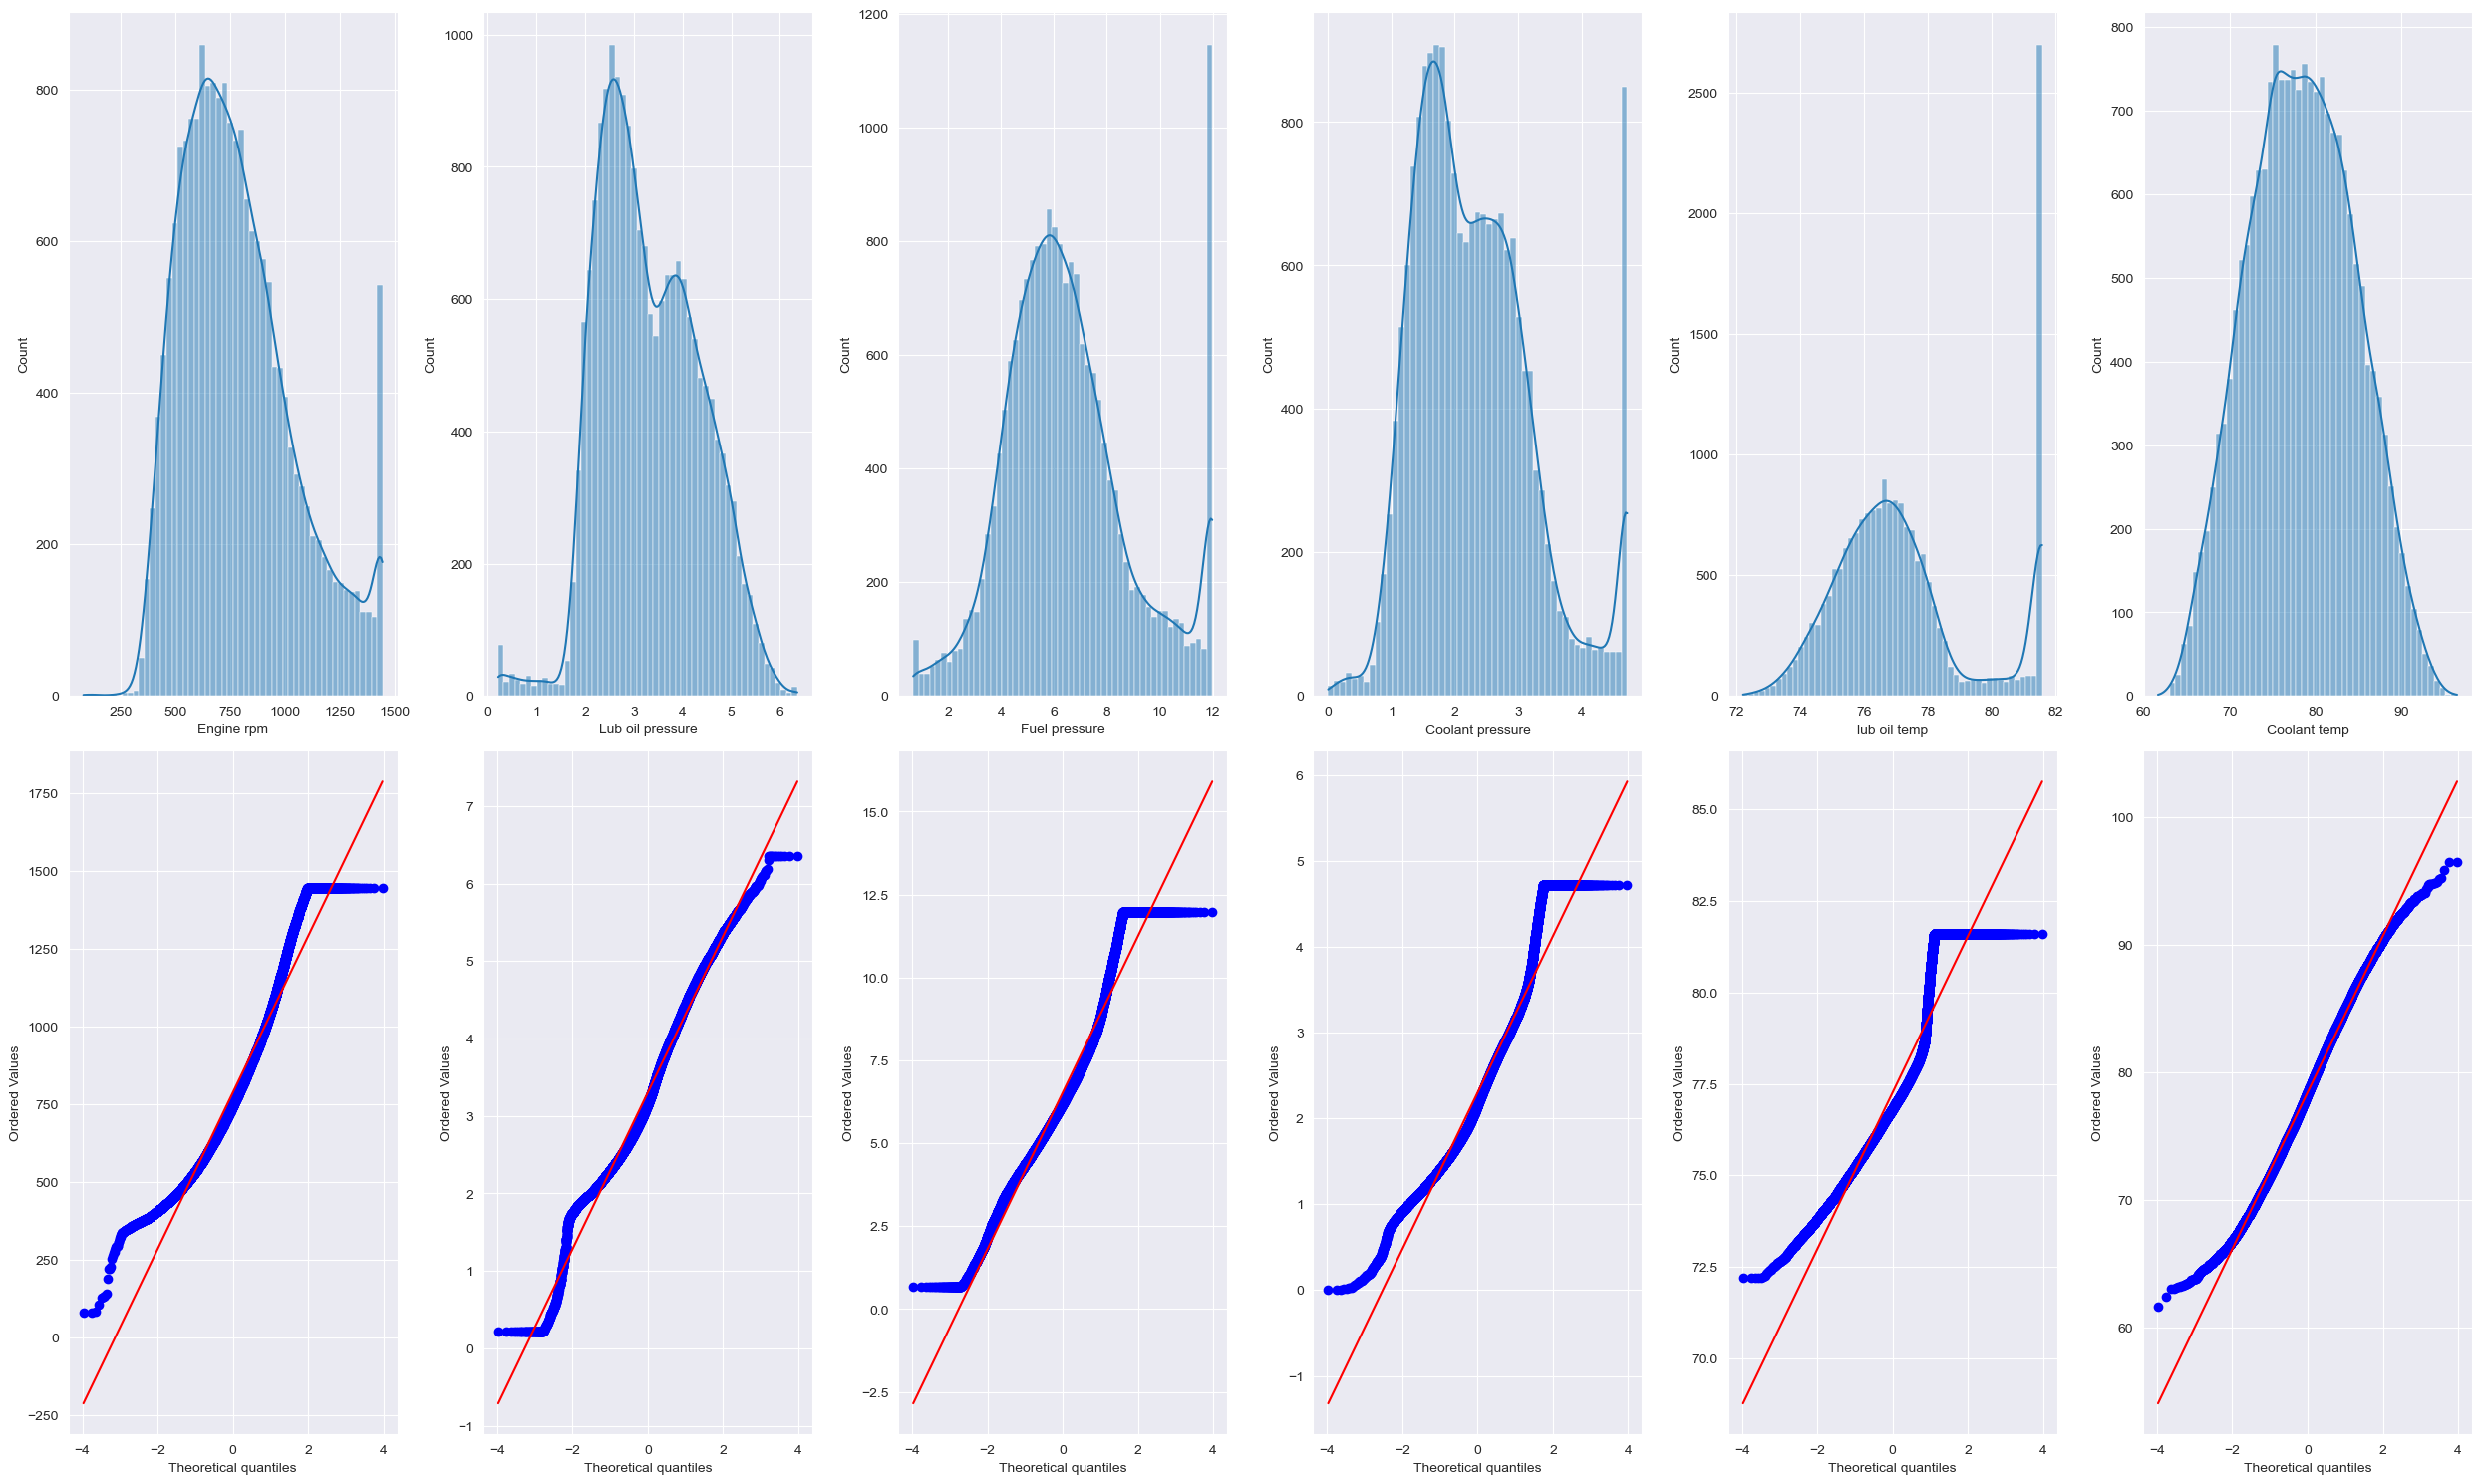

In [ ]:
import scipy.stats as stats

# Visualizing histogram and Q-Q plot together

plt.figure(figsize=(25, 15))
for i in list(enumerate(columns_to_plot.columns)):
    plt.subplot(2, 6, i[0] + 1)
    sns.histplot(data = columns_to_plot[i[1]], kde=True)

for i in list(enumerate(columns_to_plot.columns)):
    plt.subplot(2, 6, i[0] + 7)
    stats.probplot(columns_to_plot[ i[1]], dist="norm", plot=plt)   # QQ Plot
    plt.title("")

plt.tight_layout()
plt.show()

In [ ]:
# print the skewness of the Data Columns
skew = columns_to_plot.skew()
print("-------- Skewness of Data Columns --------")
for i in range(len(skew)):
  print("{} : {:.5f}".format(columns_to_plot.columns[i], skew[i]))

-------- Skewness of Data Columns --------
Engine rpm : 0.71418
Lub oil pressure : 0.19849
Fuel pressure : 0.53505
Coolant pressure : 0.75668
lub oil temp : 0.71477
Coolant temp : 0.05399


C:\Users\kisha\AppData\Local\Temp\ipykernel_448\582677084.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("{} : {:.5f}".format(columns_to_plot.columns[i], skew[i]))


* According to above graphs and Skewness Measures, we can see that some columns have skewness but we can proceed with Model Building since the Skewness Values are not very severe. (Not Greater than +1 and -1)

## Data Scaling/ Standardize the Features

In [ ]:
x = engine_data.drop("Engine Condition", axis=1)
y = pd.DataFrame(engine_data['Engine Condition'], columns=["Engine Condition"])

In [ ]:
x.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,700.0,2.493592,11.790927,3.178981,81.590241,81.632187
1,876.0,2.941606,11.987104,2.464504,77.640934,82.445724
2,520.0,2.961746,6.553147,1.064347,77.752266,79.645777
3,473.0,3.707835,11.987104,3.727455,74.129907,71.774629
4,619.0,5.672919,11.987104,2.052251,78.396989,87.000225


In [ ]:
print(y.head())

   Engine Condition
0                 1
1                 0
2                 1
3                 1
4                 0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 41)


In [ ]:
X_train.shape, X_test.shape

((14651, 6), (4884, 6))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scalar = MinMaxScaler()

x_train_scaled = minmax_scalar.fit_transform(X_train)
x_test_scaled = minmax_scalar.transform(X_test)

x_test_scaled

array([[0.60447214, 0.64830231, 0.41589509, 0.46308568, 0.38250937,
        0.53435653],
       [0.33907625, 0.54568996, 0.46058002, 0.42310315, 1.        ,
        0.88612615],
       [0.41532258, 0.6176603 , 0.25679308, 0.38126366, 0.55355721,
        0.56583739],
       ...,
       [0.39992669, 0.60547684, 0.4616368 , 0.43155699, 0.53084444,
        0.06260314],
       [0.30095308, 0.34420912, 0.65206856, 0.48240463, 0.74543381,
        0.50444221],
       [0.4952346 , 0.40373573, 0.27030103, 0.43689002, 0.6473915 ,
        0.59378308]])

## Random Forest Classifier

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,  columns=X_test.columns)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
y_train = np.ravel(y_train)

rfc.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(x_test_scaled)
y_pred_rfc

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

Çonfusion Matrix: 
Accuracy Score: 65.4995904995905


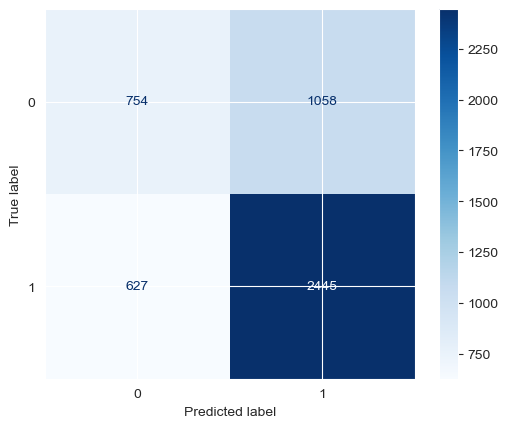

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

print('Çonfusion Matrix: ')
ConfusionMatrixDisplay.from_estimator(rfc,x_test_scaled, y_test, cmap='Blues')
print('Accuracy Score: {}'.format((accuracy_score(y_test, y_pred_rfc) * 100)))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

logistic_regression.fit(x_train_scaled, y_train)

LogisticRegression()

Çonfusion Matrix: 
Accuracy Score: 66.46191646191646


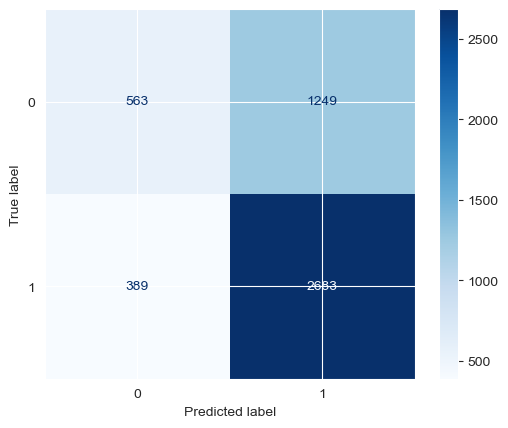

In [ ]:
y_pred_logistic_regr = logistic_regression.predict(x_test_scaled)
y_pred_logistic_regr

print('Çonfusion Matrix: ')
ConfusionMatrixDisplay.from_estimator(logistic_regression,x_test_scaled, y_test, cmap='Blues')
print('Accuracy Score: {}'.format((accuracy_score(y_test, y_pred_logistic_regr) * 100)))

## Desicion Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

Çonfusion Matrix: 
Accuracy Score: 59.807534807534815


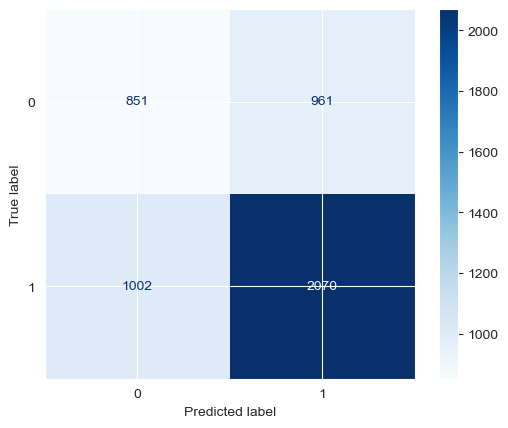

In [ ]:
y_pred_decision_tree = decision_tree.predict(x_test_scaled)
y_pred_decision_tree

print('Çonfusion Matrix: ')
ConfusionMatrixDisplay.from_estimator(decision_tree,x_test_scaled, y_test, cmap='Blues')
print('Accuracy Score: {}'.format((accuracy_score(y_test, y_pred_decision_tree) * 100)))

## Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge_regression = RidgeClassifier()
ridge_regression.fit(x_train_scaled, y_train)

RidgeClassifier()

Çonfusion Matrix: 
Accuracy Score: 66.52334152334153


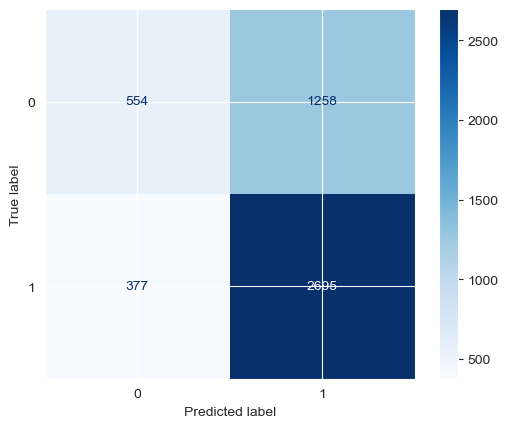

In [ ]:
y_pred_ridge_regression = ridge_regression.predict(x_test_scaled)
y_pred_ridge_regression

print('Çonfusion Matrix: ')
ConfusionMatrixDisplay.from_estimator(ridge_regression,x_test_scaled, y_test, cmap='Blues')
print('Accuracy Score: {}'.format((accuracy_score(y_test, y_pred_ridge_regression) * 100)))

## Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train_scaled, y_train)

GaussianNB()

Çonfusion Matrix: 
Accuracy Score: 66.03194103194103


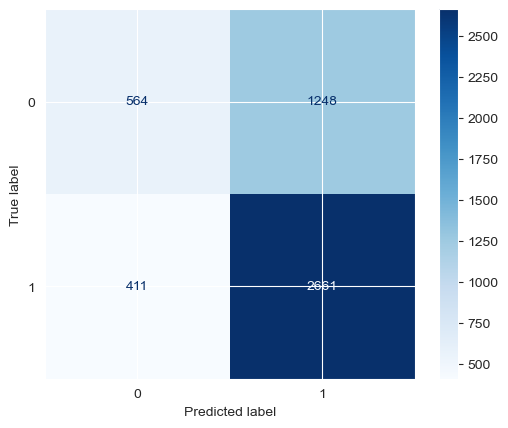

In [ ]:
y_pred_naive_bayes = naive_bayes.predict(x_test_scaled)
y_pred_naive_bayes

print('Çonfusion Matrix: ')
ConfusionMatrixDisplay.from_estimator(naive_bayes,x_test_scaled, y_test, cmap='Blues')
print('Accuracy Score: {}'.format((accuracy_score(y_test, y_pred_naive_bayes) * 100)))

## Generating Results for above 5 Classifiers

In [ ]:
from sklearn.metrics import classification_report


random_forest_report = classification_report(y_test, y_pred_rfc, zero_division=1)
print("-------Random Forest Report------")
print(random_forest_report)

logistic_regr_report = classification_report(y_test, y_pred_logistic_regr,zero_division=1 )
print("-------Logistic Regression Report------")
print(logistic_regr_report)

decision_tree_report = classification_report(y_test, y_pred_decision_tree,zero_division=1 )
print("-------Decision Tree Report------")
print(decision_tree_report)

ridge_regression_report = classification_report(y_test, y_pred_ridge_regression,zero_division=1 )
print("-------Ridge Regression Report------")
print(ridge_regression_report)

naive_bayes_report = classification_report(y_test, y_pred_naive_bayes,zero_division=1 )
print("-------Naive Bayes Report------")
print(naive_bayes_report)

-------Random Forest Report------
              precision    recall  f1-score   support

           0       0.55      0.42      0.47      1812
           1       0.70      0.80      0.74      3072

    accuracy                           0.65      4884
   macro avg       0.62      0.61      0.61      4884
weighted avg       0.64      0.65      0.64      4884

-------Logistic Regression Report------
              precision    recall  f1-score   support

           0       0.59      0.31      0.41      1812
           1       0.68      0.87      0.77      3072

    accuracy                           0.66      4884
   macro avg       0.64      0.59      0.59      4884
weighted avg       0.65      0.66      0.63      4884

-------Decision Tree Report------
              precision    recall  f1-score   support

           0       0.46      0.47      0.46      1812
           1       0.68      0.67      0.68      3072

    accuracy                           0.60      4884
   macro avg       0

### Based on above data, we can suggest that 'Logistic Regression' Model would be more applicable for this Vehicle Engine Health Dataset. Since this is related to Predictive Maintenance, it is important to predict the correct class. That means, when the Vehicle Engine is NOT in Good Health, it should be predicted to start maintenance process. Also, this Logistic Regression give highest F1-Score for Positive class as well.